In [2]:
import sys
sys.path.append('../src')

import realvirtual_yolo as rvy

# YOLO Model Training

In [3]:
dataset_path = 'C:/Users/VincentRoller/Desktop/lego-training-urp-1k/dataset.yaml'


In [4]:
model_export_folder = 'C:/Users/VincentRoller/Desktop/'
model_name = 'lego_urp_1k'


In [5]:
rvy.pp.check_device()

Device          : NVIDIA GeForce RTX 3060 Laptop GPU
PyTorch version : 2.4.0
CUDA version    : 12.4
CUDNN version   : 90100


In [6]:
device = rvy.pp.get_device()
device

device(type='cuda')

In [18]:
from ultralytics import YOLO

In [8]:
export_root = f'{model_export_folder}/{model_name}'
onnx_path = f'{export_root}/{model_name}.onnx'

In [9]:
samples = rvy.pp.get_sample_files(dataset_path, mode='val')

In [21]:
model = YOLO(onnx_path)

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [47]:
sample = samples[10]


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1035.bmp: 640x640 5 IOs, 4 NIOs, 50.3ms
Speed: 8.2ms preprocess, 50.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


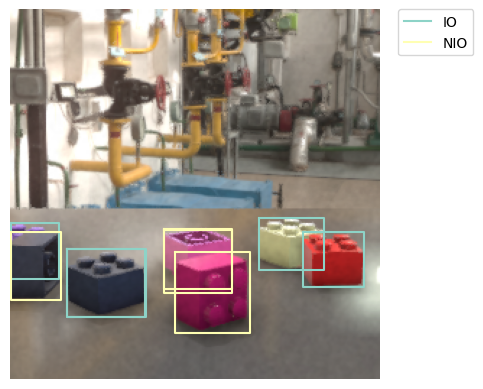

In [48]:
results = model.predict(sample, imgsz=640, conf=0.25)
rvy.show_results(results, model)


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1035.bmp: 640x640 157 IOs, 143 NIOs, 52.3ms
Speed: 6.9ms preprocess, 52.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


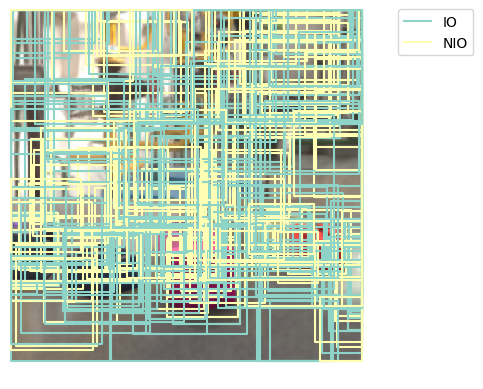

In [62]:
results = model.predict(sample, imgsz=640, conf=0.0)
rvy.show_results(results, model)

In [63]:
boxes = results[0].boxes
boxes.shape

torch.Size([300, 6])

In [64]:
boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9451], device='cuda:0')
data: tensor([[172.2601, 143.9217, 216.9165, 179.8409,   0.9451,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[194.5883, 161.8813,  44.6564,  35.9193]], device='cuda:0')
xywhn: tensor([[0.7601, 0.6323, 0.1744, 0.1403]], device='cuda:0')
xyxy: tensor([[172.2601, 143.9217, 216.9165, 179.8409]], device='cuda:0')
xyxyn: tensor([[0.6729, 0.5622, 0.8473, 0.7025]], device='cuda:0')

In [65]:
boxes.cls

tensor([0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 

In [53]:
boxes.conf

tensor([9.4514e-01, 9.0675e-01, 8.0258e-01, 7.7816e-01, 5.5342e-01, 4.8858e-01, 4.4920e-01, 3.6770e-01, 2.8288e-01, 2.0718e-01, 1.7395e-01, 1.5350e-01, 5.5871e-02, 3.8619e-02, 3.7782e-02, 3.5927e-02, 2.1469e-02, 1.8758e-02, 1.2044e-02, 1.1190e-02, 9.7024e-03, 9.1816e-03, 7.0232e-03, 5.2798e-03, 5.2235e-03, 5.0978e-03,
        3.3512e-03, 3.3377e-03, 3.2418e-03, 3.0282e-03, 3.0237e-03, 2.6436e-03, 2.4008e-03, 2.2900e-03, 2.0423e-03, 1.9576e-03, 1.9148e-03, 1.9114e-03, 1.8816e-03, 1.8722e-03, 1.8381e-03, 1.8038e-03, 1.6980e-03, 1.6388e-03, 1.6015e-03, 1.5543e-03, 1.5529e-03, 1.5368e-03, 1.5211e-03, 1.5160e-03, 1.4793e-03, 1.3954e-03,
        1.3753e-03, 1.3263e-03, 1.2837e-03, 1.2668e-03, 1.2499e-03, 1.2463e-03, 1.2412e-03, 1.2390e-03, 1.2270e-03, 1.2164e-03, 1.2073e-03, 1.2052e-03, 1.1650e-03, 1.1579e-03, 1.1480e-03, 1.1433e-03, 1.1408e-03, 1.1308e-03, 1.1049e-03, 1.1032e-03, 1.1003e-03, 1.0965e-03, 1.0923e-03, 1.0900e-03, 1.0831e-03, 1.0830e-03,
        1.0816e-03, 1.0803e-03, 1.0710e-

In [70]:
for box in boxes:
    if box.conf > 0.25:
        print(box)
        print()
        print()

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9451], device='cuda:0')
data: tensor([[172.2601, 143.9217, 216.9165, 179.8409,   0.9451,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[194.5883, 161.8813,  44.6564,  35.9193]], device='cuda:0')
xywhn: tensor([[0.7601, 0.6323, 0.1744, 0.1403]], device='cuda:0')
xyxy: tensor([[172.2601, 143.9217, 216.9165, 179.8409]], device='cuda:0')
xyxyn: tensor([[0.6729, 0.5622, 0.8473, 0.7025]], device='cuda:0')


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9067], device='cuda:0')
data: tensor([[202.1768, 153.9847, 244.4731, 192.0620,   0.9067,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[223.3249, 173.0234,  42.2963,  38.0773]], device='cuda:0')
xywhn: tensor([[0.8724, 0.6759, 0.1652, 

In [54]:
from PIL import Image
import numpy as np

img = None
with Image.open(sample) as img:
    print("Original image size:", img.size)
    resized_img = img.resize((640, 640))
    print("Resized image size:", resized_img.size)

    img = np.array(resized_img)

img = img.transpose(2, 0, 1)
img = img.reshape(1, 3, img.shape[1], img.shape[2])
img = img / 255.0
img = img.astype(np.float32)

print(img.shape)
print(img.dtype)

    

Original image size: (256, 256)
Resized image size: (640, 640)
(1, 3, 640, 640)
float32


In [55]:
np.max(img), np.min(img)

(1.0, 0.019607844)

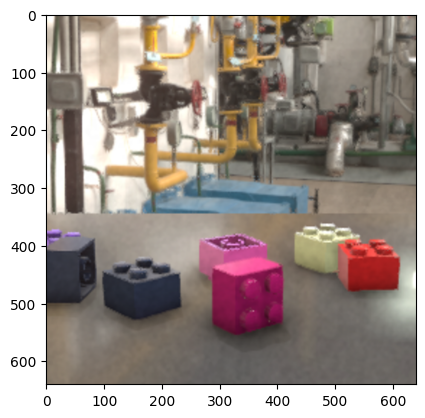

In [56]:
#plot the image
import matplotlib.pyplot as plt
plt.imshow(img[0].transpose(1, 2, 0))

In [58]:
import onnxruntime as ort
import numpy as np

# Load the ONNX model
session = ort.InferenceSession(onnx_path)

for input in session.get_inputs():
    print(f"Input name: {input.name}")
    print(f"Input shape: {input.shape}")
    print(f"Input type: {input.type}")
    print()


for output in session.get_outputs():
    print(f"Output name: {output.name}")
    print(f"Output shape: {output.shape}")
    print(f"Output type: {output.type}")
    print()

input_name = session.get_inputs()[0].name


Input name: images
Input shape: [1, 3, 640, 640]
Input type: tensor(float)

Output name: output0
Output shape: [1, 300, 6]
Output type: tensor(float)



In [59]:
outputs = session.run(None, {input_name: img})
result = outputs[0]
result.shape

(1, 300, 6)

In [66]:
result[:,0,:]

array([[     505.38,      385.62,      611.41,      480.18,     0.97429,           0]], dtype=float32)

In [68]:
conf = result[:, 0, 4]
conf

array([    0.97429], dtype=float32)

In [ ]:
for c in results.conf:
    if c == 

In [56]:
import torch
tensor = torch.from_numpy(img).to(device)
tensor.shape


torch.Size([1, 3, 640, 640])

In [58]:
pred = model(tensor)
print(pred[0].shape)


0: 640x640 5 IOs, 3 NIOs, 64.2ms
Speed: 2.5ms preprocess, 64.2ms inference, 135.9ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'Results' object has no attribute 'shape'. See valid attributes below.

    A class for storing and manipulating inference results.

    This class encapsulates the functionality for handling detection, segmentation, pose estimation,
    and classification results from YOLO models.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
        boxes (Boxes | None): Object containing detection bounding boxes.
        masks (Masks | None): Object containing detection masks.
        probs (Probs | None): Object containing class probabilities for classification tasks.
        keypoints (Keypoints | None): Object containing detected keypoints for each object.
        obb (OBB | None): Object containing oriented bounding boxes.
        speed (Dict[str, float | None]): Dictionary of preprocess, inference, and postprocess speeds.
        names (Dict[int, str]): Dictionary mapping class IDs to class names.
        path (str): Path to the image file.
        _keys (Tuple[str, ...]): Tuple of attribute names for internal use.

    Methods:
        update: Updates object attributes with new detection results.
        cpu: Returns a copy of the Results object with all tensors on CPU memory.
        numpy: Returns a copy of the Results object with all tensors as numpy arrays.
        cuda: Returns a copy of the Results object with all tensors on GPU memory.
        to: Returns a copy of the Results object with tensors on a specified device and dtype.
        new: Returns a new Results object with the same image, path, and names.
        plot: Plots detection results on an input image, returning an annotated image.
        show: Shows annotated results on screen.
        save: Saves annotated results to file.
        verbose: Returns a log string for each task, detailing detections and classifications.
        save_txt: Saves detection results to a text file.
        save_crop: Saves cropped detection images.
        tojson: Converts detection results to JSON format.

    Examples:
        >>> results = model("path/to/image.jpg")
        >>> for result in results:
        ...     print(result.boxes)  # Print detection boxes
        ...     result.show()  # Display the annotated image
        ...     result.save(filename="result.jpg")  # Save annotated image
    

In [ ]:
print(pred[0][:,:,300])

In [34]:
!pip install scikit-image


  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.9 MB 7.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/12.9 MB 8.0 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.9 MB 7.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.9 MB 7.9 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.9 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/12.9 MB 8.0 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/12.9 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 7.8 MB/s eta 0:00:00
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)



image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_10.bmp: 640x640 5 IOs, 2 NIOs, 53.4ms
Speed: 5.5ms preprocess, 53.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


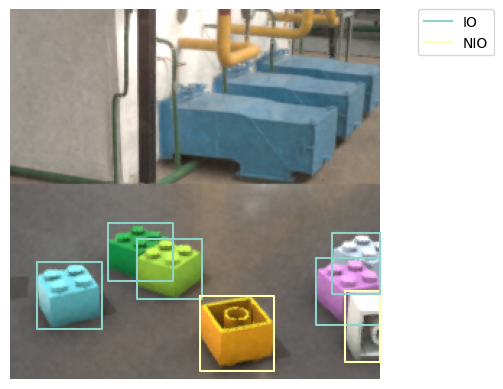


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_100.bmp: 640x640 5 IOs, 1 NIO, 107.7ms
Speed: 6.6ms preprocess, 107.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


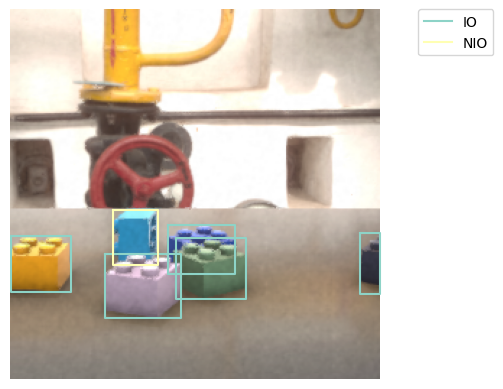


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1008.bmp: 640x640 1 IO, 5 NIOs, 83.5ms
Speed: 7.6ms preprocess, 83.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


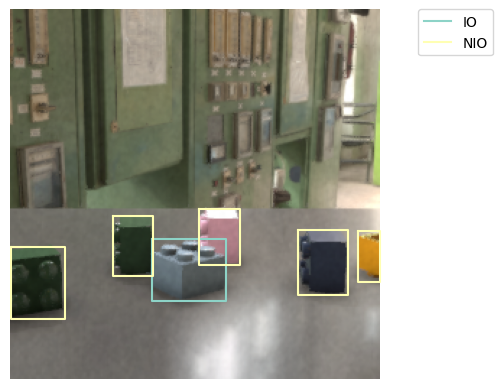


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1009.bmp: 640x640 6 IOs, 3 NIOs, 75.1ms
Speed: 8.0ms preprocess, 75.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


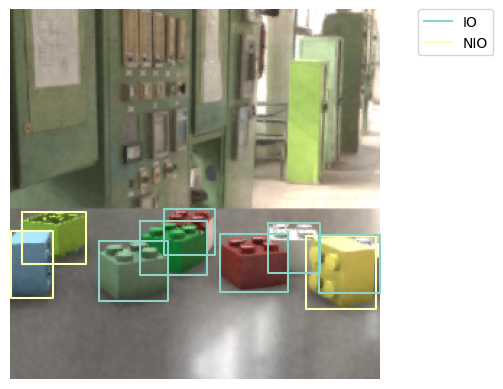


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1012.bmp: 640x640 2 IOs, 4 NIOs, 83.8ms
Speed: 4.9ms preprocess, 83.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


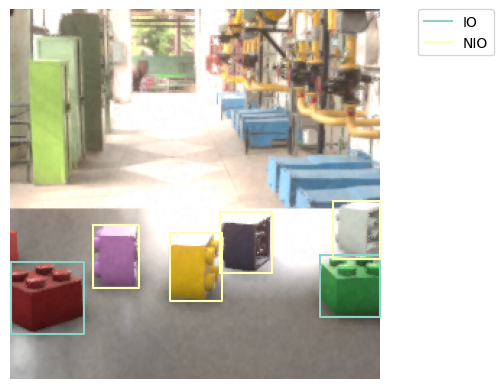


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1016.bmp: 640x640 2 IOs, 4 NIOs, 51.4ms
Speed: 9.1ms preprocess, 51.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


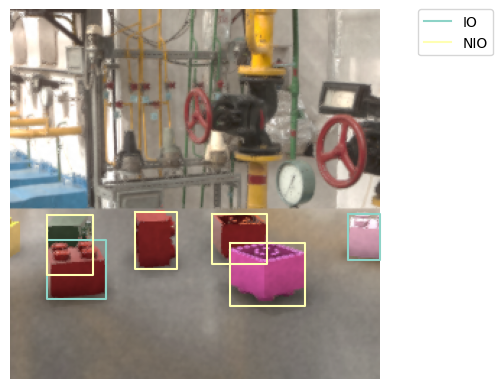


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_102.bmp: 640x640 2 IOs, 4 NIOs, 49.2ms
Speed: 7.5ms preprocess, 49.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


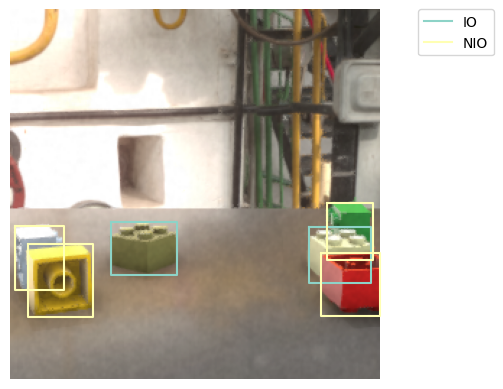


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1023.bmp: 640x640 5 IOs, 2 NIOs, 102.9ms
Speed: 6.9ms preprocess, 102.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


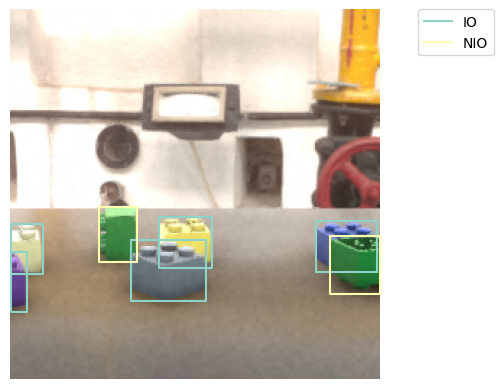


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1027.bmp: 640x640 3 IOs, 3 NIOs, 78.8ms
Speed: 7.3ms preprocess, 78.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


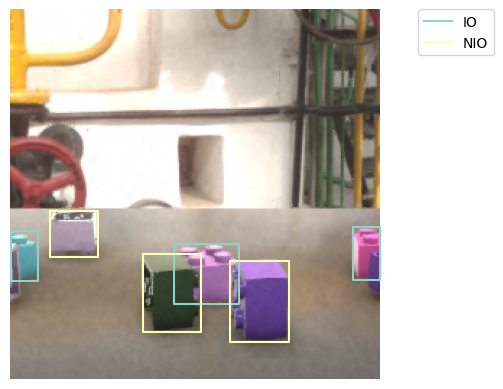


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1028.bmp: 640x640 1 IO, 5 NIOs, 76.2ms
Speed: 9.6ms preprocess, 76.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


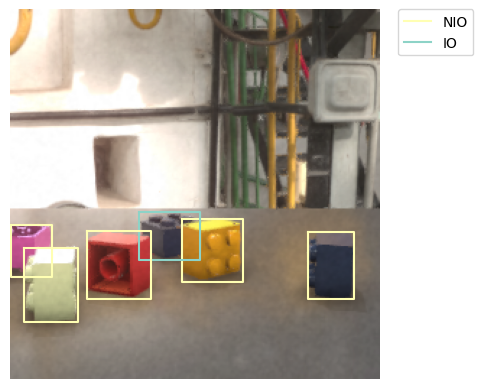


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1035.bmp: 640x640 4 IOs, 3 NIOs, 73.6ms
Speed: 8.7ms preprocess, 73.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


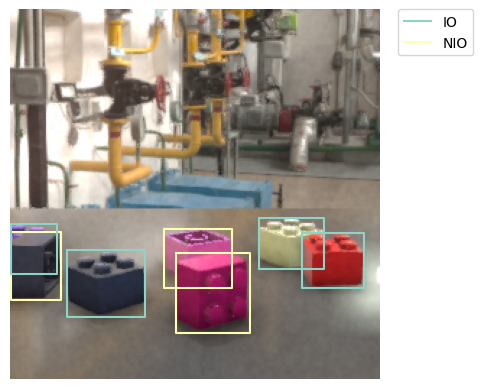


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1036.bmp: 640x640 3 IOs, 3 NIOs, 49.6ms
Speed: 6.5ms preprocess, 49.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


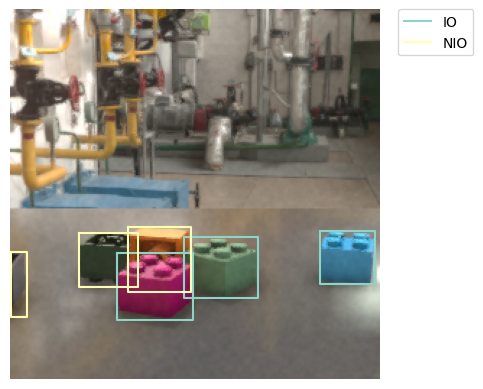


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_104.bmp: 640x640 3 IOs, 1 NIO, 52.2ms
Speed: 8.5ms preprocess, 52.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


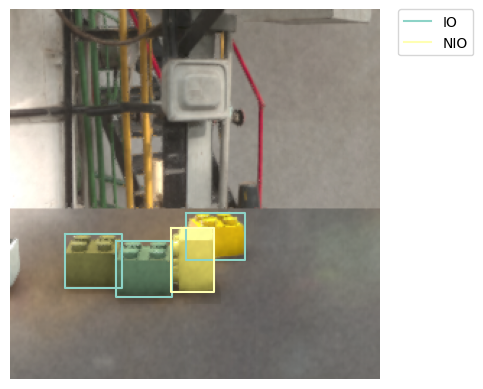


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1041.bmp: 640x640 2 IOs, 5 NIOs, 50.2ms
Speed: 8.5ms preprocess, 50.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


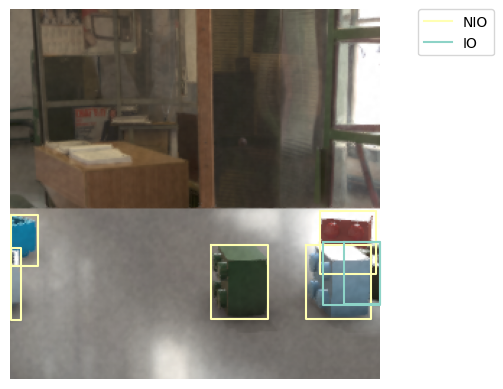


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1042.bmp: 640x640 4 IOs, 5 NIOs, 72.8ms
Speed: 9.0ms preprocess, 72.8ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


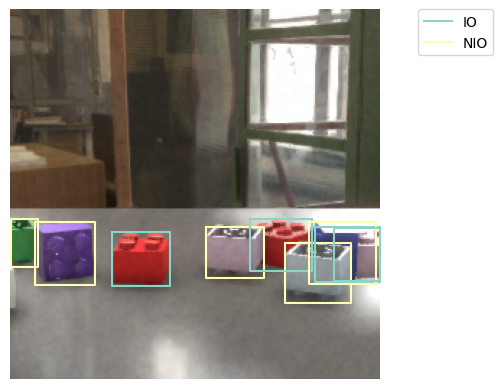


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1046.bmp: 640x640 3 IOs, 5 NIOs, 50.1ms
Speed: 6.1ms preprocess, 50.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


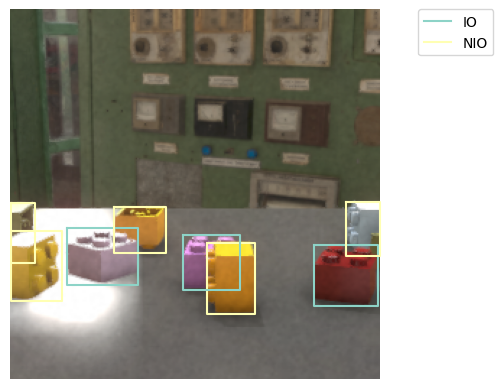


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1051.bmp: 640x640 3 IOs, 4 NIOs, 102.7ms
Speed: 5.1ms preprocess, 102.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


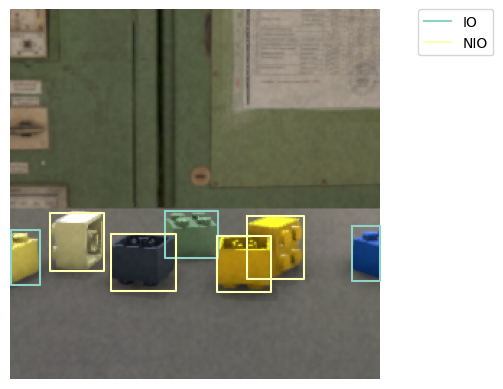


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1055.bmp: 640x640 4 IOs, 3 NIOs, 81.8ms
Speed: 6.5ms preprocess, 81.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


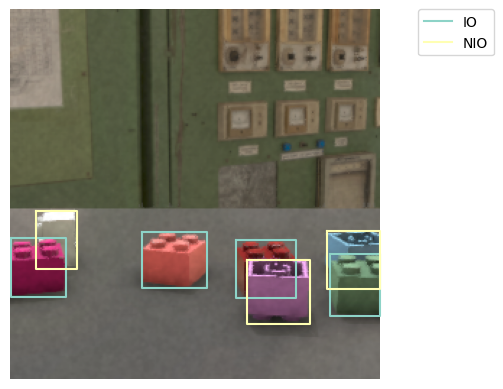


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1065.bmp: 640x640 5 IOs, 2 NIOs, 73.1ms
Speed: 4.5ms preprocess, 73.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


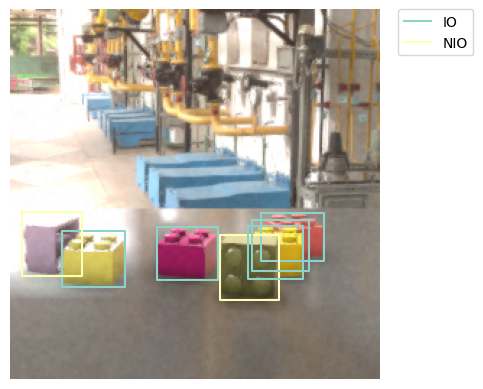


image 1/1 C:\Users\VincentRoller\Desktop\lego-training-urp-1k\images\val\sample_1068.bmp: 640x640 2 IOs, 5 NIOs, 35.2ms
Speed: 5.5ms preprocess, 35.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


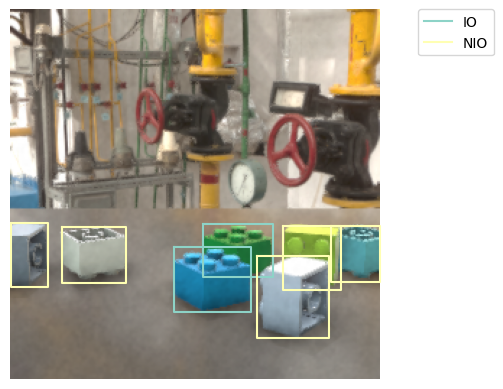

In [38]:
for i in range(20):
    sample = samples[i]
    results = model.predict(
        sample,
        imgsz=train_config['imgsz'],
        conf=0.25,  # default is 0.25
    )


    rvy.show_results(results, model)